# Symbolic Aggregate approXimation *(SAX)* Encoding

In [1]:
!pip install git+https://github.com/nickprock/pynuTS.git@main

  Cloning https://github.com/nickprock/pynuTS.git (to revision main) to /tmp/pip-req-build-77kqscy_
  Created wheel for pynuTS: filename=pynuTS-0.2.0-py3-none-any.whl size=9536 sha256=7a80b641a219dedf7a88f40750a080c44b5a01f3fcbc9fd59391b87aea39120a
  Stored in directory: /tmp/pip-ephem-wheel-cache-anw3c1io/wheels/59/58/6e/2fb72676efefa1bcc454c7ea3f3939d5cc3245b098efa20f64
Successfully built pynuTS


In [2]:
import pandas as pd
import numpy as np
from pynuTS.decomposition import NaiveSAX

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

Symbolic Aggregate approXimation Encoding (SAX Encoding)

* Developed in 2002 by Keogh e Lin
* Dimensionality Reduction for sequences

* In this example we will use it to find anomaly patterns. For more informations read this [KDNuggets article](https://www.kdnuggets.com/2019/09/time-series-baseball.html).

## Create dataset.

We Create 10 sequences with 12 observations.


In [4]:
# Some useful functions
def sigmoid(x, a, b, c):
    expo = a * (b - x)
    sig = 1 / ( 1 + np.exp( expo ) ) * c
    return sig


def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [5]:
time = np.arange(12)

np.random.seed(42)
a = 0.5
b = 10
c = 20

list_series = []
for i in range(10):
  noise = white_noise(time)
  temp = sigmoid(time, a, b, c) + noise
  list_series.append(temp)

### Create DataFrame

* every row is a period
* every column is a sequence

In [6]:
X = pd.DataFrame(list_series).T

In [7]:
X

,0,1,2,3,4,5,6,7,8,9
0,-0.266078,0.748651,0.414780,1.512615,-1.158970,0.866130,0.659629,-0.104753,-0.142906,0.808023
1,-0.314782,-1.248535,-0.433813,0.205142,-0.416515,1.606866,0.708039,0.300861,0.646923,-1.066043
2,0.168197,0.552605,-2.036707,1.589169,2.301298,-1.583723,-1.461552,0.918434,-0.075366,0.277665
3,0.814194,0.895086,1.229728,-0.968854,0.594637,1.121926,-0.059432,1.264372,0.075179,1.165771
4,1.066833,1.921243,1.205036,0.592111,2.190590,1.087148,0.311193,1.706280,1.495216,2.149319
5,2.728059,2.732343,2.016678,2.973368,1.524611,1.109757,2.354363,3.099378,1.274684,1.702897
6,2.030616,2.340360,2.221127,1.986320,3.721861,1.446613,1.777543,3.041849,3.145614,2.482858
7,4.128862,2.652654,3.568603,3.738964,2.896187,3.316464,1.575028,2.516066,2.844640,3.025259
8,3.895281,6.215069,6.848589,6.526058,6.394491,5.817556,5.467659,4.404068,3.606052,5.620386
9,7.303398,7.350619,7.331299,6.950797,8.160819,8.455338,5.957829,7.068761,7.791772,6.726861


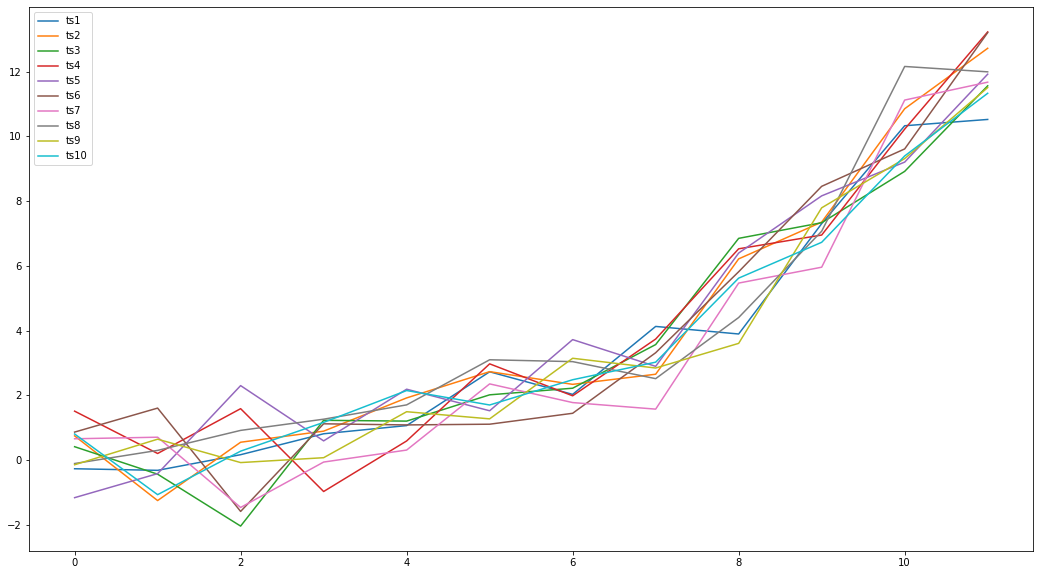

In [8]:
X.plot(figsize=(18,10))
plt.legend(["ts1", "ts2","ts3","ts4","ts5","ts6","ts7","ts8","ts9","ts10"])
plt.show()

## Anomaly detection with SAX Encoding

We choose a window size 4. We reduct the 12 periods in 3 periods, like quarters in a year.

In [9]:
sax = NaiveSAX(windows=4)

In [10]:
sax_strings = np.apply_along_axis(sax.fit_transform, 1, X)

## Dimensionality Reduction with **Piecewise Aggregate Approximation**

The **Piecewise Aggregate Approximation** is a sequence of labels, like 'AAA' in this case.

In [11]:
sax_strings

array(['CAB', 'ACB', 'BAC', 'ACB', 'ABC', 'CBA', 'ABC', 'CAB', 'CBA',
       'ACB', 'BCA', 'BCA'], dtype='<U3')

We create a new column and we count the occorrence

In [12]:
X["sax_strings"]=sax_strings

In [23]:
count = X.sax_strings.value_counts().reset_index()

Now we define when a time series is an anomaly. In this example an anomaly is a time series with frequency 1.

In [27]:
anomaly_limit=1
X["anomaly"] = False
X.loc[X['sax_strings'].isin(count.loc[count['sax_strings']==anomaly_limit, 'index']),'anomaly']=True

### Plot the series

In blu the standard patterns

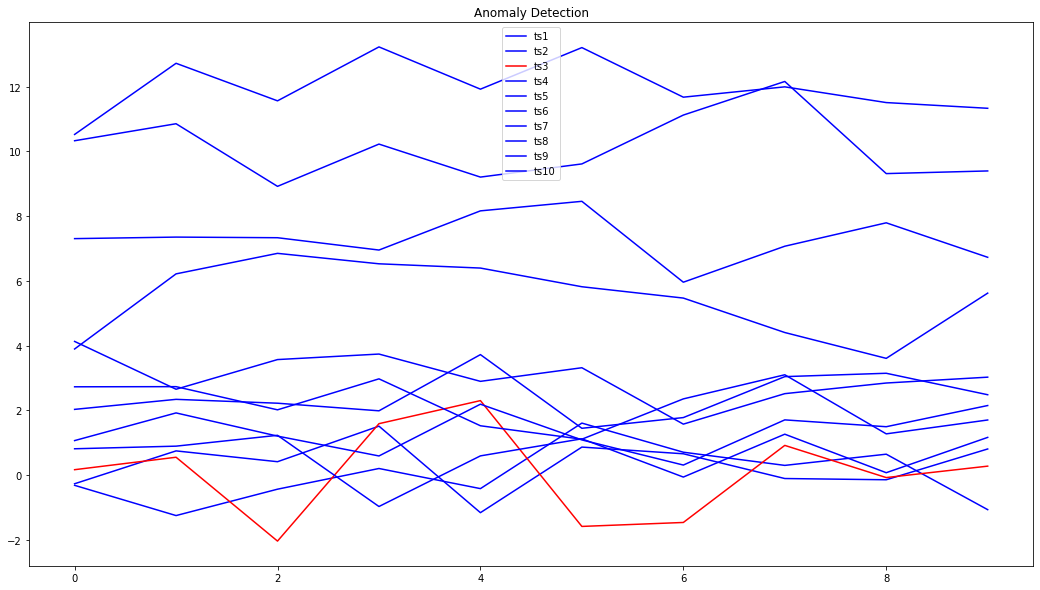

In [29]:
plt.figure(figsize=(18,10))
for i in range(X.shape[0]):
    if X.iloc[i,-1]:
        col = 'r'
    else:
        col = 'b'
    plt.plot(X.iloc[i,:-2], col)
plt.legend(["ts1", "ts2","ts3","ts4","ts5","ts6","ts7","ts8","ts9","ts10"])
plt.title("Anomaly Detection")
plt.show()

## Credits

pynuTS by Nicola Procopio 2020

Original repository https://github.com/nickprock/pynuTS/

<br>

* *The **sigmoid** function was created by [Piero Savastano](https://github.com/pieroit) for [covid19italia](https://github.com/ondata/covid19italia/blob/master/visualizzazione/analisi_predittiva.ipynb)*

* *The **white_noise** function was created by [Aurélien Géron](https://github.com/ageron) for an Udacity course*
